In [1]:
from becquerel import Spectrum
from becquerel.tools import Isotope, IsotopeQuantity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spec = Spectrum.from_file('examples/UCB102_Nori.Spe')

SpeFile: Reading file examples/UCB102_Nori.Spe


C:\Users\joann\AppData\Roaming\Python\Python35\site-packages\becquerel-0.1.0-py3.5.egg\becquerel\parsers\spe_file.py:148: SpectrumFileParsingWarning: SpeFile has $PRESETS field, skipping 3 lines
  SpectrumFileParsingWarning)


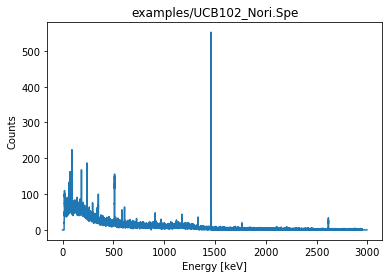

In [3]:
spec.plot()

In [4]:
# Specific info for calculating efficiency: Co_60 as an example
isotope = 'co60'
date = '2008-01-15'
uci = 9.38
live_time = spec.livetime
current_activity = IsotopeQuantity(isotope, date, uci).bq_now()

NNDCRequestError: Request failed: Internal Server Error

In [ ]:
# Calculate net counts from deltaE estimation: sum of two deltaE counts
# Specific deltaE range defined by user or default: K-40, Cs-137, etc
# Use deltaE on both side to interpolate background on the middle region
# Subtraction for actual peak counts 
# Efficiency calculation
delta_E = 100 #keV
target_peak = 1173.23 #keV
counts_1 = np.sum(spec.counts_vals[target_peak-1.5*delta_E:target_peak-0.5*delta_E])
counts_2 = np.sum(spec.counts_vals[target_peak+0.5*delta_E:target_peak+1.5*delta_E])
counts_target = np.sum(spec.counts_vals[target_peak-0.5*delta_E:target_peak+0.5*delta_E])
background = (counts_1 + counts_2)/2
net_counts = counts_target - background
eff = (net_counts/live_time)/(current_activity)